In [2]:
import os

In [3]:
os.getcwd()

'/home/shsingh/knowledge_distillation'

In [4]:
import glob
# import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import random
from sklearn.preprocessing import MinMaxScaler
import imageio   # Convert to an image 
import nibabel as nib

In [5]:

TRAIN_DATASET_PATH = 'knowledge_distillation/dataset/scratch/MICCAI_BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
#VALIDATION_DATASET_PATH = 'BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData'

# test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_flair.nii.gz').get_fdata()
# print(test_image_flair.max())

In [6]:
#View a few images
scaler = MinMaxScaler()
#Note: Segmented file name in Folder 355 has a weird name. Rename it to match others.

TRAIN_DATASET_PATH = 'knowledge_distillation/dataset/scratch/MICCAI_BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
#VALIDATION_DATASET_PATH = 'BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData'

test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_flair.nii.gz').get_fdata()
print(test_image_flair.max())
#Scalers are applied to 1D so let us reshape and then reshape back to original shape. 
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)


test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1.nii.gz').get_fdata()
test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1ce.nii.gz').get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t2.nii.gz').get_fdata()
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_seg.nii.gz').get_fdata()
test_mask=test_mask.astype(np.uint8)

1854.603271484375


In [7]:
print(np.unique(test_mask))  #0, 1, 2, 4 (Need to reencode to 0, 1, 2, 3)
test_mask[test_mask==4] = 3  #Reassign mask values 4 to 3
print(np.unique(test_mask)) 

[0 1 2 4]
[0 1 2 3]


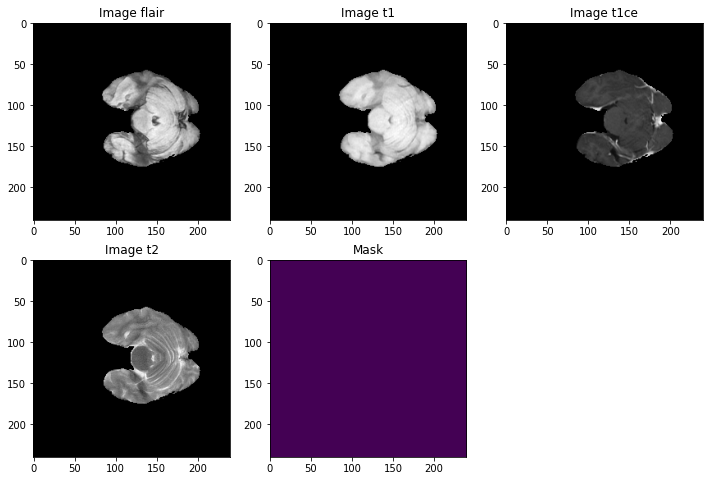

In [8]:
n_slice=random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [37]:
#Flair, T1CE, annd T2 have the most information
#Combine t1ce, t2, and flair into single multichannel image

combined_x = np.stack([test_image_flair, test_image_t1ce, test_image_t2], axis=3)

combined_x=combined_x[56:184, 56:184, 13:141] #Crop to 128x128x128x4

#Do the same for mask
# test_mask = test_mask[56:184, 56:184, 13:141]

In [38]:
np.shape(combined_x)

(128, 128, 128, 3)

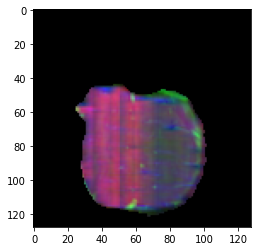

In [39]:
plt.imshow(combined_x[...,10,:], cmap="gray")

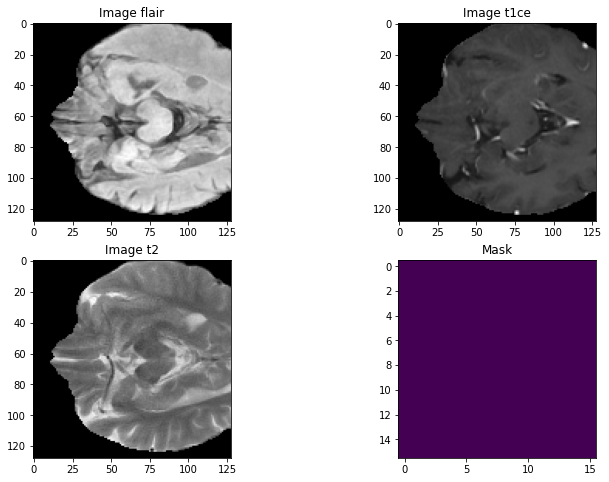

In [40]:

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()



In [ ]:
data_path = "knowledge_distillation/dataset/scratch/MICCAI_BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001"

example_filename = os.path.join(data_path, 'BraTS20_Training_001_flair.nii.gz')
img = nib.load(example_filename)
img_arr = nib.load(example_filename).get_fdata()


In [5]:
dataset_path = 'knowledge_distillation/dataset/scratch/MICCAI_BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
save_path = 'knowledge_distillation/dataset/scratch/MICCAI_BraTS2020_TrainingData_2D/'

filenames = os.listdir(data_path) 

for f in filenames:
    print(f)
    img_name = f
    output_path = os.path.join(save_path, img_name)
    try:
        os.makedirs(output_path)
    except:
        pass
    
    
    #View a few images
    scaler = MinMaxScaler()
    #Note: Segmented file name in Folder 355 has a weird name. Rename it to match others.

    train_image_flair= nib.load(dataset_path + img_name + '/'+ img_name+  '_flair.nii.gz').get_fdata()
    print(train_image_flair.max())
    #Scalers are applied to 1D so let us reshape and then reshape back to original shape. 
    train_image_flair=scaler.fit_transform(train_image_flair.reshape(-1, train_image_flair.shape[-1])).reshape(train_image_flair.shape)


    train_image_t1=nib.load(dataset_path + img_name+ '/'+ img_name + '_t1.nii.gz').get_fdata()
    train_image_t1=scaler.fit_transform(train_image_t1.reshape(-1, train_image_t1.shape[-1])).reshape(train_image_t1.shape)

    train_image_t1ce=nib.load(dataset_path + img_name + '/' + img_name + '_t1ce.nii.gz').get_fdata()
    train_image_t1ce=scaler.fit_transform(train_image_t1ce.reshape(-1, train_image_t1ce.shape[-1])).reshape(train_image_t1ce.shape)

    train_image_t2=nib.load(dataset_path + img_name + '/'+ img_name + '_t2.nii.gz').get_fdata()
    train_image_t2=scaler.fit_transform(train_image_t2.reshape(-1, train_image_t2.shape[-1])).reshape(train_image_t2.shape)

    train_mask=nib.load(dataset_path + img_name + '/'+ img_name + '_seg.nii.gz').get_fdata()
    train_mask=train_mask.astype(np.uint8)

    
    

BraTS20_Training_256
BraTS20_Training_221
BraTS20_Training_326
BraTS20_Training_351
BraTS20_Training_052
BraTS20_Training_025
BraTS20_Training_128
BraTS20_Training_058
BraTS20_Training_122
BraTS20_Training_155
BraTS20_Training_369
BraTS20_Training_213
BraTS20_Training_264
BraTS20_Training_363
BraTS20_Training_314
BraTS20_Training_280
BraTS20_Training_219
BraTS20_Training_183
BraTS20_Training_017
BraTS20_Training_060
BraTS20_Training_189
BraTS20_Training_167
BraTS20_Training_110
BraTS20_Training_084
BraTS20_Training_238
BraTS20_Training_335
BraTS20_Training_342
BraTS20_Training_245
BraTS20_Training_232
BraTS20_Training_348
BraTS20_Training_131
BraTS20_Training_146
BraTS20_Training_041
BraTS20_Training_036
BraTS20_Training_307
BraTS20_Training_293
BraTS20_Training_200
BraTS20_Training_277
BraTS20_Training_299
BraTS20_Training_174
BraTS20_Training_103
BraTS20_Training_097
BraTS20_Training_079
BraTS20_Training_109
BraTS20_Training_190
BraTS20_Training_004
BraTS20_Training_073
BraTS20_Train

In [ ]:
img = nib.load(img_path) 
img_data = img.get_fdata()

img_save_path =os.path.join(save_path, img_name,img_name)

In [ ]:
def nii_to_image(niifile):
    
    filenames = os.listdir(filepath) # Read nii Folder 
    slice_trans = []

    for f in filenames:
        # Start reading nii Documents 
        img_path = os.path.join(filepath, f)
        img = nib.load(img_path)    # Read nii
        img_fdata = img.get_fdata()
        fname = f.replace('.nii.gz','')   # Remove nii Suffix name of 
        img_f_path = os.path.join(imgfile, fname)
        # Create nii The folder of the corresponding image 
        if not os.path.exists(img_f_path):
            os.mkdir(img_f_path)    # New Folder 

        # Start converting to an image 
        (x,y,z) = img.shape
        for i in range(z):      #z Is a sequence of images 
            silce = img_fdata[i, :, :]   # You can choose which direction of slice 
            imageio.imwrite(os.path.join(img_f_path,'{}.png'.format(i)), silce)
                # Save an image 

In [ ]:
img.shape

In [ ]:
img.header

In [ ]:
for plane in range(scan.shape[2]):
    p = scan[:,:,plane].astype(np.uint8)
    img = Image.fromarray(p)
    img.save( f'plane{plane}.png' )

In [ ]:
img_arr =  np.array(img.dataobj)

In [ ]:
# img = img.get_data
img = img[:,:,59]
plt.imshow(img)
plt.show()

In [ ]:

mapping_path = "knowledge_distillation/dataset/scratch/MICCAI_BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/name_mapping.csv"
df_map = pd.read_csv(mapping_path)
df_map

In [ ]:
df_map[:10]

In [ ]:
df_map['Grade'].value_counts()

In [ ]:
survival_path = "knowledge_distillation/dataset/scratch/MICCAI_BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/survival_info.csv"
df_surv = pd.read_csv(survival_path)
df_surv

In [ ]:
df_surv